In [16]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import inv, qr, pinv

# Introducción 

La regresión lineal es un método para modelar las relaciones entre una o más variables independientes y una variable dependiente. Se trata de un método que puede ser reformulado usando notación matricial y resuelto haciendo uso de operaciones matriciales.

# Que es la regresión lineal

La regresión lineal es un método para modelar la realación entre dos valores escalares: una variable de entrada **x** y una variable de salida **y**. El modelo asume que **y** es una función lineal de **x**.

$$y = b_{0} + b_{1}x_{1}$$

El modelo puede ser usado para modelar una variable de salida dadas múltiples variables de entrada.

$$y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}x_{n}$$

El objetivo es crear un modelo de regresión lineal para encontrar los valores para los coeficientes **b**, que minimizan el error en la predicción de la variable de salida.

# Formulación matricial de la regresión lineal

La regresión lineal puede ser formulada haciendo uso de la notación matricial de la siguiente forma

$$y = Xb$$

Donde **X** son los datos de entrada y cada columna es una característica, b es un vector de coeficientes e y es nuestro vector de salida. Una vez reformulado nuestro problema, este se convierte en un sistema de ecuaciones lineales donde los valores del vector **b** son desconocidos.
La forma más típica para encontrar la solución óptima, es encontrar aquellos valores que minimizan el error cuadrático también conocido como el método de mínimos cuadrados.

$$ || Xb - y||^{2} = \sum_{i=1}^{m}\sum_{j=1}^{n}X_{ij}(b_j - y_i)^{2}$$

Esta formulación tiene una única solución. En notación matricial este problema puede ser formulado haciendo uso de la ecuación normal.

$$ X^{T}Xb = X^{T}y$$

$$ b = (X^{T}X)^{-1}X^{T}y$$

Esta ecuación puede ser resuelta de forma directa, aunque dada la presencia de la matriz inversa puede ser numéricamente un reto y ser un sistema inestable.

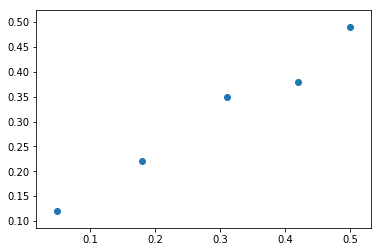

In [7]:
# A continuación vamos a proceder a crear un dataset el cuál vamos a intenter resolver
data = np.array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])

#Dividimos entre variale de entrada y variable de salida
X, y = data[:,0], data[:,1]

#Hacemos un scatter plot
plt.scatter(X, y)
plt.show()

# Resolver vía inversa

El primer enfoque a la hoora de encontrar los coeficientes es resolver el problema directamente usando la matriz inversa. Un problema que tiene este enfoque es que el cálculo de la matriz inversa es computacionalmente costoso y numéricamente inestable.

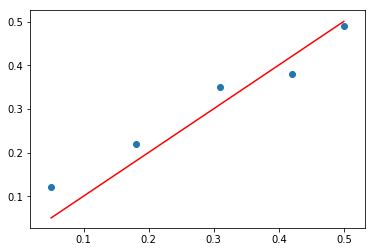

In [10]:
#Hacemos un reshape
X = X.reshape((len(X), 1))

#Resolvemos via la matriz inversa
b = inv(X.T.dot(X)).dot(X.T).dot(y)

#Calculamos las predicciones
pred = X.dot(b)

#Vemos los resultados gráficamente
plt.scatter(X, y)
plt.plot(X, pred, color = 'red')
plt.show()

# Resolver vía descomposición QR

La descomposición QR es un enfoque que rompe una matriz en elementos constituyentes
$$A = QR$$

Donde A es la matriz que deseamos descomponer, Q es una matriz de tamaño mxm, y R es una matriz triangular superior de tamaño mxn. La descomposición QR es un enfoque muy popular a la hora de resolver la ecuación de mínimos cuadrados. Los coeficientes pueden ser resueltos de la siguiente forma:

$$ b = R^{-1}Q^{T}y$$

La descomposición QR es un enfoque mucho más eficiente computacionalmente y numéricamente más estable que obtener la resolución directamente mediante la matriz inversa, pero no funciona para todas las matrices.

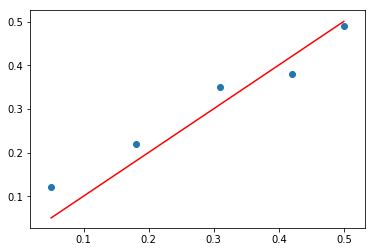

In [15]:
#Obtenemos la descomposición qr
Q, R = qr(X)

#Obtenemos los coeficientes 
b = inv(R).dot(Q.T).dot(y)

#Prediccion
pred = X.dot(b)

#Vemos el resultado
plt.scatter(X, y)
plt.plot(X, pred, color = 'red')
plt.show()

# Resolver vía SVD y Pseudoinversa

La descomposición singular de valores o SVD, es un método de descomposición matricial, que al igual que el método QR descompone una matriz en elementos constituyentes

$$X = U\Sigma V^{T}$$

Donde **X** es la matriz que deseamos descomponer, **U** es una matriz de dimensión mxm, sigma es una matriz diagonal mxn, y V es una matriz nxn.
A diferencia de la descomposición QR, todas las matrices pueden ser descompuestas mediante valores singulares. Se trata de un método más estable y es el enfoque preferido. Una vez descompuesta nuestra matriz, los coeficientes pueden ser calculados como: 
$$b = X^{+}y$$

Donde X+, es la pseudoinversa de la matriz de nuestras variables de entrada y puede ser calculada como:

$$X^{+} = UD^{+}V^{T}$$

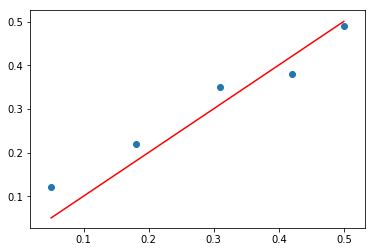

In [17]:
#Obtenemos los coeficientes
b = pinv(X).dot(y)

#Obtenemos las predicciones
pred = X.dot(b)

#Vemos los resultados
plt.scatter(X, y)
plt.plot(X, pred, color = 'red')
plt.show()